<h2 style="font-weight: bold">Titanic Competition</h2>

<h4>This is my first published notebook ever, So yeah it can't be about something other than the Titanic Competition 😄<br><br>I will be doing a simple then advanced EDA, Data Visualization and Pre-Processing. I also will test different models and techniques to improve my score.<br></h4>

* <h5 style="font-weight: 700">Your feedback is very welcome</h5>
* <h5 style="font-weight: 700">If you find this notebook useful, please don't forget to upvote it!</h5>


In [1]:
# Required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  **Exploratory Data Analysis**

In [4]:
# Getting to know data
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
# summary of numerical variable
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# summary of categorial variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# checking null values
print("training data\n",train.isnull().sum())
print("\ntesting data\n",test.isnull().sum())

training data
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

testing data
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# let's clean visualizations :)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


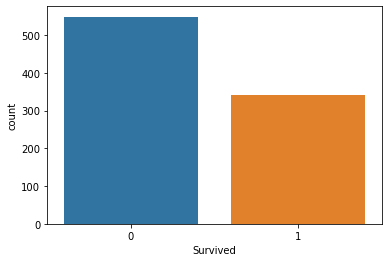

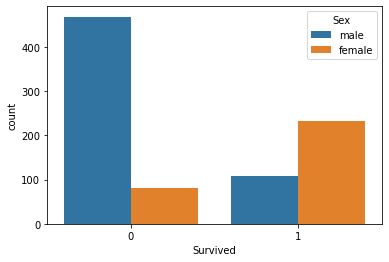

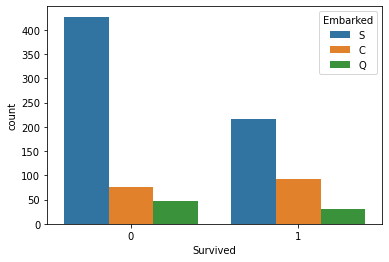

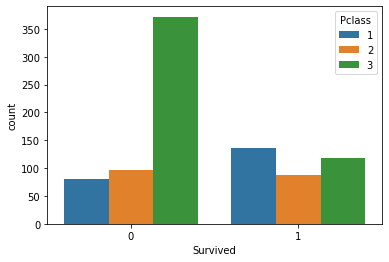

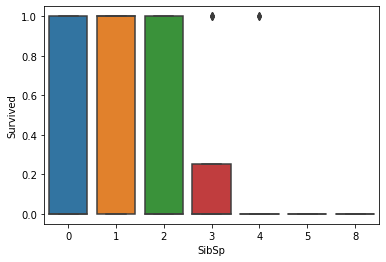

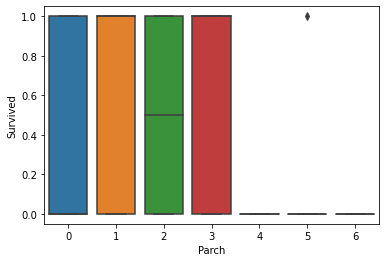

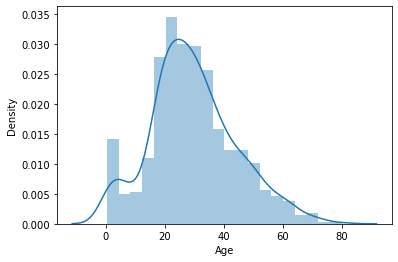

In [11]:
# Visualization
count_plt = sns.countplot(train["Survived"])
plt.show(count_plt)

Sex_plt = sns.countplot(x= "Survived",data=train, hue="Sex")
plt.show(Sex_plt)

Embarked_plt = sns.countplot(x="Survived", data=train, hue="Embarked")
plt.show(Embarked_plt)

Pclass_plt = sns.countplot(x="Survived", data=train, hue="Pclass")
plt.show(Pclass_plt)

SibSp_plt = sns.boxplot(x="SibSp", y= "Survived", data=train)
plt.show(SibSp_plt)

Parch_plt = sns.boxplot(x="Parch", y= "Survived", data=train)
plt.show(Parch_plt)

Age_plt = sns.distplot(train["Age"])
plt.show(Age_plt)

<AxesSubplot:>

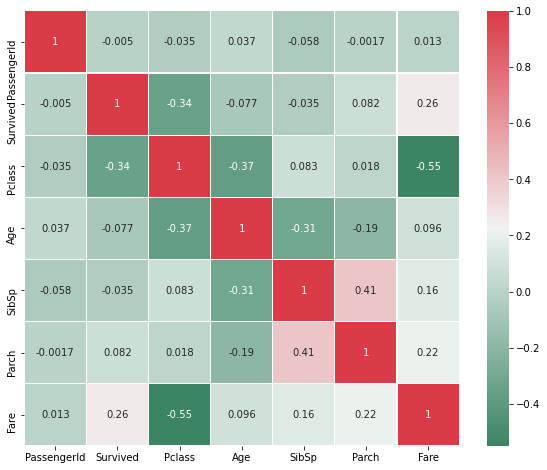

In [12]:
# Correlation heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),linewidths=0.1,annot=True, cmap=sns.diverging_palette(150, 10, as_cmap=True),
            square=True, ax=ax)

# **Pre-Processing**

In [13]:
# age_mean, fair mean
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna('S', inplace = True)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
# drop cabin column
train.drop(columns=["Cabin", "Name"], axis=1, inplace=True)
test.drop(columns=["Cabin", "Name"], axis=1, inplace=True)

In [17]:
# Removing insignificant variables

# change categorical to int for train
embarked=pd.get_dummies(train["Embarked"], drop_first=True)
sex=pd.get_dummies(train["Sex"], drop_first=True)

train=pd.concat([train, embarked, sex],axis=1)
train.drop(columns=["Sex", "Embarked", "Ticket"], axis=1, inplace=True)

# change categorical to int for test
embarked=pd.get_dummies(test["Embarked"], drop_first=True)
sex=pd.get_dummies(test["Sex"], drop_first=True)

test=pd.concat([test, embarked, sex],axis=1)
test.drop(columns=["Sex", "Embarked", "Ticket"], axis=1, inplace=True)

In [18]:
# checking data
print(train.head())
print(test.head())
print(train.corr())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Q  S  male
0            1         0       3  22.0      1      0   7.2500  0  1     1
1            2         1       1  38.0      1      0  71.2833  0  0     0
2            3         1       3  26.0      0      0   7.9250  0  1     0
3            4         1       1  35.0      1      0  53.1000  0  1     0
4            5         0       3  35.0      0      0   8.0500  0  1     1
   PassengerId  Pclass   Age  SibSp  Parch     Fare  Q  S  male
0          892       3  34.5      0      0   7.8292  1  0     1
1          893       3  47.0      1      0   7.0000  0  1     0
2          894       2  62.0      0      0   9.6875  1  0     1
3          895       3  27.0      0      0   8.6625  0  1     1
4          896       3  22.0      1      1  12.2875  0  1     0
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Q            891 non-null    uint8  
 8   S            891 non-null    uint8  
 9   male         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Q            418 non-null    uint8  
 7   S            418 non-null    uint8  
 8   male         418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


# **Training and Predicting**

In [21]:
# Classification Methods

# Logistic Regression
train_x= train.drop(columns=["Survived"], axis=1)
train_y= train["Survived"]

test_x= test.copy()

logistic = LogisticRegression(solver='liblinear')
logistic.fit(train_x, train_y)

prediction_y= logistic.predict(test_x)

In [22]:
print(logistic.score(train_x, train_y))

0.8058361391694725


In [23]:
# Submission

output= pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction_y})
output.to_csv("Submission.csv", index=False)
print("Done")

Done
